# The Monty Hall Problem

The Monty Hall Problem is a famous game show problem which involves a host, a contestant, three doors, 2 goats, and 1 Ferrari. The game show goes like this:
    
1. The contestant picks any door (1, 2, or 3). Let's say this is door 1.

2. The host then reveals what is behind one of the doors that is not selected and not surprisingly it is a goat. Let's say this is door 3. So door 1 (the contestant's original selection) and door 2 (the door that has yet to be revealed) are still in play.

3. The host then asks the contestant if they want to stay with the original guess, door 1 in our example, or switch to the remaining door, which is door 2 in our example.
    
What would you do? Would you stay with your original guess of door 1 or would you switch to door 2? What is probability of winning the Ferrari if you stay? What is the probability if you switch? If you said that your probability increases from 1/3 to 1/2 if you stay, and should therefore stay, sorry you're wrong! That isn't to say you won't win if you stay, in fact you should win approximately 1/3 of the time. However, if you consistently (and blindly) switch your pick after the host reveals the first goat, your probability of winning increases to 2/3.

Let's think about this logically for a second. One major key to this problem is that the host will never reveal which door the Ferrari is behind (this is a game show after all so we must keep the audience's interest!). So with that understanding, let's assume that you choose to implement the strategy of blindly switching to the other door with your 2nd attempt. For you to win (i.e., select the door hiding the Ferrari with your second guess), you would have had to first select a goat so that you could switch to the Ferrari. Remember, the host is never going to reveal which door the Ferrari is behind thus eliminating one of the goats. What is the probability of selecting a goat at the beginning? That's right; it is 2/3! With the swithcing strategy, in order for you to lose (i.e., select the door hiding the goat with your second guess), you would have to originally selected the Ferrari. The probability of doing so is 1/3. Note, that the probability of winning should you stay each time is equal to one minus the probability of winning if you switch each time, or simply: P(Stay_Winning) = 1 - P(Switch_Winning) = 1 - 2/3 = 1/3.

Let's prove this with some code.

# Solution

## Import Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizations
%matplotlib inline
sns.set_style('darkgrid')

## Generate Multiple Environments

In [3]:
# containers to house 0 or 1 depending on the outcome
stay = []
switch = []
doors = [1,2,3]

# we will consider 10^4 "environments" where the contestant either stays or switches
environments = range(10**4)
for environment in environments:

    # randomly assign the Ferrari behind door 1,2, or 3
    ferrari_door = np.random.randint(1,4)
    
    # random assign a guess for the contestant
    contestant_guess = np.random.randint(1,4)
    
    # goat doors are the doors that are not hiding the Ferrari 
    goat_doors = [door for door in doors if door != ferrari_door]
   
    # host reveals a goat. Note, if the host has 2 doors to choose from,
    # it is because the contestant_guess == ferrari_door
    # If the host has only 1 door to choose from, then contestant_guess != ferrari_door
    possible_reveal_doors = [door for door in goat_doors if door != contestant_guess]
    if len(possible_reveal_doors) == 2:
        reveal_door = np.random.choice(possible_reveal_doors)
    else:
        reveal_door = possible_reveal_doors[0]
       
    # Define the door that the contest would switch to
    # We only care about the sole element of this list
    switch_door = [door for door in doors if door != contestant_guess and door != reveal_door][0]

    # Let's record the results of our model over 10^4 switching or staying outcomes
    if ferrari_door == switch_door:
        switch.append(1)
        stay.append(0)
    else:
        switch.append(0)
        stay.append(1)

## Calculate Probability of Winning for Each Startegy

In [4]:
# Probabilities
prob_win_switch = np.mean(switch)
prob_win_stay = np.mean(stay)
print(f"Probability of Winning if Switch: {prob_win_switch : 0.2%}")
print(f"Probability of Winning if Stay: {prob_win_stay : 0.2%}")

Probability of Winning if Switch:  66.68%
Probability of Winning if Stay:  33.32%


## Vizualize Our Results

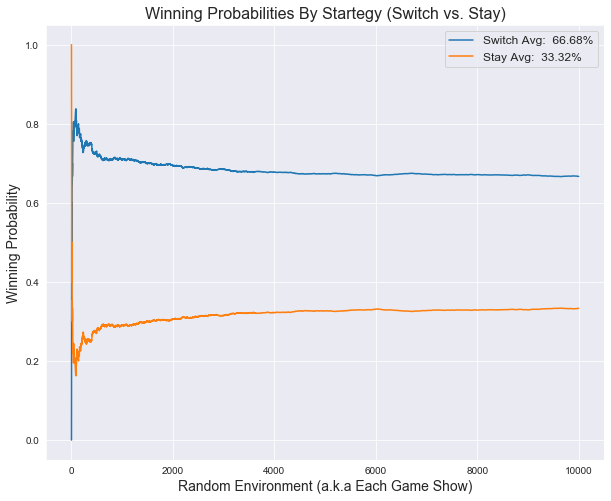

In [5]:
# Create figure and add subplot
fig = plt.figure(figsize = (10,8));
ax = fig.add_subplot(111);

# Redefine environments and define winning % for each environments in environments
environments = range(1,10**4+1)
switch_probs = [np.mean(switch[:environment]) for environment in environments]
stay_probs = [np.mean(stay[:environment]) for environment in environments]

# Generate line graphs of win probabilites for each environment
ax.plot(environments, switch_probs, label=f"Switch Avg: {prob_win_switch : 0.2%}");
ax.plot(environments, stay_probs, label=f"Stay Avg: {prob_win_stay : 0.2%}");

# Add labels
ax.set_title("Winning Probabilities By Startegy (Switch vs. Stay)", {'fontsize' :  16});
ax.set_ylabel("Winning Probability", {'fontsize' :  14});
ax.set_xlabel("Random Environment (a.k.a Each Game Show)", {'fontsize' :  14});

# Add legend
ax.legend(fontsize = 'large');